## http://tiny.cc/apssdc-datasets

# Linear Regression Theory

The term `“linearity”` in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.
![LinearRegression1](Images/LinearRegression1.png)
The equation of the above line is :

**Y= mx + c**

>Where ***c*** is the intercept and **m** is the slope of the line. So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). The y and x variables remain the same, since they are the data features and cannot be changed. The values that we can control are the intercept(b) and slope(m). There can be multiple straight lines depending upon the values of intercept and slope. Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

C:\Users\Jesus\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Jesus\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\Jesus\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [1]:
brain = pd.read_csv('headbrain.csv')
brain.head(10)

NameError: name 'pd' is not defined

In [3]:
brain.shape

(237, 4)

In [4]:
brain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
Gender                 237 non-null int64
Age Range              237 non-null int64
Head Size(cm^3)        237 non-null int64
Brain Weight(grams)    237 non-null int64
dtypes: int64(4)
memory usage: 7.5 KB


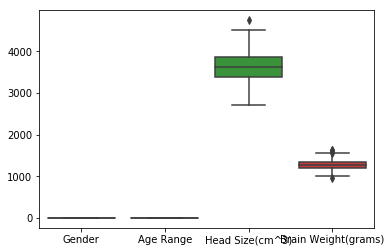

In [5]:
sns.boxplot(data = brain)

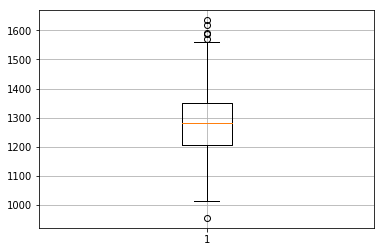

In [6]:
plt.boxplot(brain['Brain Weight(grams)'])
plt.grid()
plt.show()

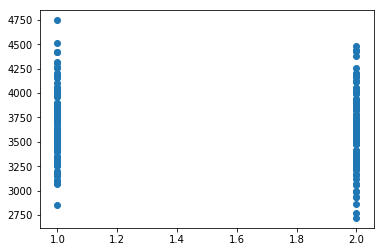

In [7]:
plt.scatter(brain['Age Range'],brain['Head Size(cm^3)'])
plt.show()

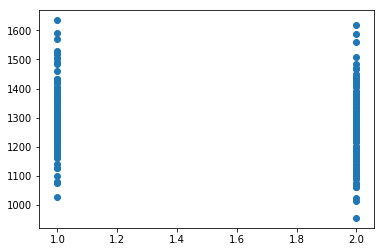

In [8]:
plt.scatter(brain['Age Range'],brain['Brain Weight(grams)'])
plt.show()

In [9]:
brain.duplicated().sum()

0

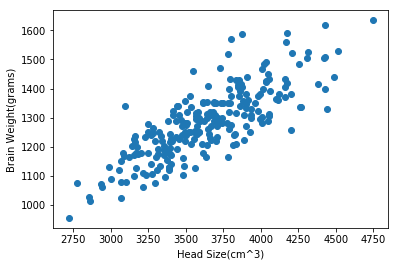

In [10]:
plt.scatter(brain['Head Size(cm^3)'],brain['Brain Weight(grams)'])
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.show()

## $\ Y = MX + C $

## $\ Slope M = \sum_{i=0}^{len(X)} \frac{(X_i - X_{mean} ) * (Y_i - Y_{mean}) }{(X_i - X_{mean} ) ^ 2}$

In [11]:
X = brain['Head Size(cm^3)'].values
Y = brain['Brain Weight(grams)'].values

In [12]:
x_mean = X.mean()
y_mean = Y.mean()

In [13]:
n = len(X)
num = 0
den = 0
for i in range(n):
    num += (X[i] - x_mean) * (Y[i] - y_mean)
    den += (X[i] - x_mean) ** 2

M = (num) / (den)
print("Slope M: ",M)


Slope M:  0.26342933948939945


In [14]:
C = y_mean - M * x_mean
print('X_Intercept C: ',C)

X_Intercept C:  325.57342104944223


In [15]:
y_pred = 0.26342933948939945 * X + C

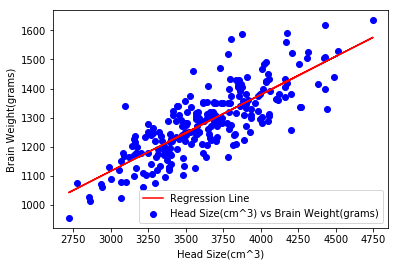

In [16]:
plt.scatter(brain['Head Size(cm^3)'],brain['Brain Weight(grams)'],label = 'Head Size(cm^3) vs Brain Weight(grams)',color = 'b')
plt.plot(brain['Head Size(cm^3)'],y_pred,'r',label='Regression Line')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

## Calculating Coefficient of Determination $(R ^2)$

It is the mean of the squared errors and is calculated as:

## $\ R ^2 = \sum_{i=0}^{len(Y)} \frac{(Y_{Predicted}-Y_{mean}) ^ 2}{(Y_i - Y_{mean}) ^ 2}$

In [17]:
up = 0
low = 0
for i in range(n):
    y_pred = M * X[i] + C
    up += ((y_pred - y_mean) ** 2)
    low += ((Y[i] - y_mean) ** 2)
R_2 = up/low
print(R_2)

0.6393117199570001


In [18]:
y_pred = M * 3738 + C
y_pred

1310.2722920608173

In [19]:
y_pred-(M * 3738 * 0.37 +C)

620.3602887371663

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression()
X = X.reshape(n,1)
reg = reg.fit(X,Y)

Y_Pred = reg.predict(X)

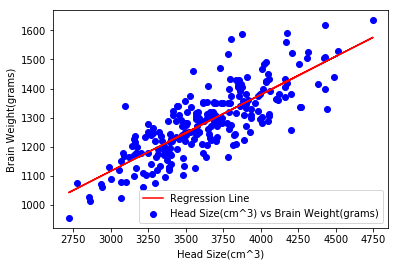

In [22]:
plt.scatter(X,Y,label = 'Head Size(cm^3) vs Brain Weight(grams)',color = 'b')
plt.plot(X,Y_Pred,'r',label='Regression Line')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

In [23]:
R_2 = reg.score(X,Y)
R_2

0.639311719957

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
X = brain['Head Size(cm^3)'].values
Y = brain['Brain Weight(grams)'].values

In [26]:
X = X.reshape(237,1)
X.shape

(237, 1)

In [27]:
reg = LinearRegression()
reg = reg.fit(X,Y)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
reg.coef_

array([0.26342934])

In [29]:
reg.intercept_

325.5734210494428

In [30]:
Y_Pred = reg.predict(X)
Y_Pred

array([1514.16660083, 1310.27229206, 1448.04583661, 1320.5460363 ,
       1425.9177721 , 1269.96760312, 1322.65347102, 1263.11844029,
       1277.34362462, 1374.5490509 , 1232.56063691, 1377.44677363,
       1284.45621679, 1434.08408162, 1335.03464997, 1346.62554091,
       1246.78582124, 1238.61951172, 1140.88722677, 1490.98481895,
       1347.15239959, 1391.40852862, 1327.65862847, 1302.89627056,
       1576.07249561, 1490.72138961, 1388.77423523, 1385.08622448,
       1235.45835965, 1425.39091342, 1323.1803297 , 1325.55119375,
       1406.42400097, 1421.70290266, 1420.91261465, 1330.29292186,
       1254.68870143, 1312.90658546, 1203.84683891, 1245.46867455,
       1369.28046411, 1248.89325596, 1462.27102095, 1327.65862847,
       1343.2009595 , 1388.24737655, 1460.42701557, 1159.32728053,
       1284.71964613, 1285.50993415, 1350.576981  , 1324.76090573,
       1450.41670067, 1395.88682739, 1382.45193108, 1236.512077  ,
       1350.31355166, 1423.02004936, 1362.16787194, 1292.09566

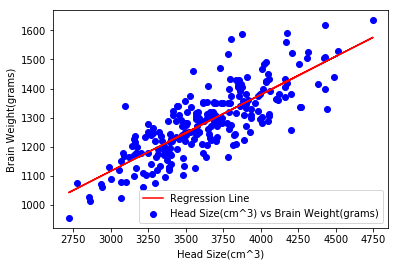

In [31]:
plt.scatter(X,Y,label = 'Head Size(cm^3) vs Brain Weight(grams)',color = 'b')
plt.plot(X,Y_Pred,'r',label='Regression Line')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

In [32]:
R_2 = reg.score(X,Y)
R_2

0.639311719957

In [33]:
reg.predict([[4512]])

array([1514.16660083])

In [38]:
brain = pd.read_csv('headbrain.csv')
brain.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [39]:
brain.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [40]:
X = brain['Head Size(cm^3)'].values
Y = brain['Brain Weight(grams)'].values

In [49]:
X = X.reshape(237,-1)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
train_test_split?

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
reg = LinearRegression()

In [57]:
x = reg.fit(X_train,Y_train)

In [68]:
reg.predict([[4512]])

array([1514.66423463])

In [67]:
reg.score(X_test,Y_test)

0.6993002108399291

In [66]:
Y_pred = reg.predict(X_test)
Y_pred

array([1246.40916268, 1346.2434787 , 1267.85897594, 1217.80941167,
       1322.14554035, 1152.66553438, 1374.31360469, 1078.25321926,
       1265.47566335, 1215.16128658, 1380.4042924 , 1194.24109834,
       1322.67516537, 1296.19391443, 1271.56635107, 1235.5518498 ,
       1576.89517432, 1297.51797698, 1196.09478591, 1491.36073381,
       1220.72234928, 1219.92791175, 1254.61835047, 1175.9690352 ,
       1231.57966216, 1185.23747303, 1265.47566335, 1492.94960887,
       1218.6038492 , 1491.0959213 , 1392.58566783, 1284.27735151,
       1207.48172381, 1139.42490891, 1492.94960887, 1343.5953536 ,
       1233.69816223, 1132.01015865, 1215.6909116 , 1394.17454289,
       1180.20603535, 1388.08385517, 1245.87953766, 1352.33416641,
       1281.62922642, 1209.07059886, 1202.71509864, 1147.10447168,
       1162.19878471, 1174.64497265, 1295.66428942, 1320.55666529,
       1157.96178456, 1361.33779173, 1380.66910491, 1244.0258501 ,
       1184.97266052, 1241.11291249, 1335.38616581, 1340.15279

In [56]:
reg = LinearRegression()
X = X.reshape(n,1)
reg = reg.fit(X,Y)

Y_Pred = reg.predict(X)